In [1]:
import pandas as pd
import numpy as np
import nltk
from collections import Counter,OrderedDict
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Q1: Tokens, Types and TTR

In [2]:
df = pd.read_csv('tweets-dataset.csv')

no_of_tokens = 0
c = Counter()
size_of_vocab = [0 for i in range(len(df)//100 +1)]
tokens_count = [0 for i in range(len(df)//100 +1)]


for i in range(len(df)):
    tokens = nltk.word_tokenize(df.loc[i]['Sentence'])
    no_of_tokens += len(tokens)
    counts = Counter(tokens)
    c.update(counts)
    if(i%100 == 0):
        size_of_vocab[i//100] = len(c)
        tokens_count[i//100] = no_of_tokens
        

print("Number of tokens = " + str(no_of_tokens))
print("Number of types = " + str(len(c)))
print("Type to Token ratio = " + str(len(c)/no_of_tokens))

Number of tokens = 396826
Number of types = 49544
Type to Token ratio = 0.12485069022695086


# Q2: Zipf's Law

### Top 150 words in decreasing frequency from the dataset are listed:

In [3]:
ranked_list = sorted(dict(c), key=dict(c).get, reverse=True)
print(ranked_list[:150])

['.', '@', 'hai', ':', '#', ',', '?', '!', 'to', 'ke', 'ki', 'nahi', 'bhi', 'the', 'se', '...', '``', 'ho', 'ka', 'ko', 'me', 'hi', 'bhai', ')', 'kar', 'aur', 'kya', 'ye', 'in', 'is', '…', 'mein', 'i', 'and', 'a', 'https', 'of', 'on', 'na', '..', 'someUSER', 'ek', 'toh', 'RT', "'s", '-', '(', 'tha', 'for', 'raha', 'you', 'ne', 'hain', 'par', 'liye', ';', 'do', 'k', 'kuch', 'koi', 'ji', 'ab', 'it', 'pe', "''", 'aap', 'rahe', 'tu', 'aaj', 'baat', 'gaya', 'with', 'main', 'at', 'be', 'h', "'", 'http/URL', 'mujhe', 'aa', 'sab', 'de', 'he', 'Ye', 'kiya', 'hota', 'hai..', 'Bhai', 'yaar', 'p', 'le', '&', 'tomorrow', 'sir', 'log', 'this', 'jo', 'diya', 'that', 'my', 'mere', 'din', 'GST', '0', 'tum', 'ya', 'http', 'time', 'hu', 'hum', 'gaye', 'are', 'thi', 'day', 'Modi', 'have', '2', 'guddu', 'd', 'I', 'like', 'kabhi', 'rahi', "n't", 'wale', 'u', 'karo', 'but', 'tak', 'bas', 'hua', 'or', 'was', 'so', 'wo', 'baar', 'chahiye', 'woh', 'kaam', 'saath', 'abhi', 'hoga', 'ghar', 'karne', 'kyu', 'we', '

### Words chosen (content words) : ['baat', 'yaar', 'sir', 'log', 'din', 'GST', 'time', 'day', 'Modi', 'guddu', 'like', 'kabhi', 'chahiye', 'kaam', 'saath', 'ghar', 'bahut']

In [4]:
words = ['baat', 'yaar', 'sir', 'log', 'din', 'GST', 'time', 'day', 'Modi', 'guddu', 'like', 'kabhi', 'chahiye', 'kaam', 'saath', 'ghar', 'bahut']
frequency = [0 for i in range(len(words))]
ranks = [ranked_list.index(i) for i in words]
for i in range(len(words)):
    frequency[i] = c[words[i]]
    print(words[i],':',c[words[i]])

baat : 568
yaar : 454
sir : 418
log : 415
din : 382
GST : 381
time : 370
day : 348
Modi : 346
guddu : 338
like : 337
kabhi : 337
chahiye : 301
kaam : 297
saath : 294
ghar : 293
bahut : 283


## Meaning

### The number of meanings m of a word obeys the law:
\begin{align}
m \propto \sqrt{f}
\end{align}

baat : ['talk', 'incident', 'saying']
yaar : ['friend', 'lover']
sir : ['sir', 'knight']
log : ['people', 'logarithm']
din : ['days', 'noise']
GST : ['Goods and Service Tax']
time : ['time']
day : ['day', 'weekday']
Modi : ['surname']
guddu : ['nickname']
like : ['similar', 'liking']
kabhi : ['ever,sometimes']
chahiye : ['needed', 'necessary']
kaam : ['work', 'business']
saath : ['company']
ghar : ['home']
bahut : ['very', 'plentiful']


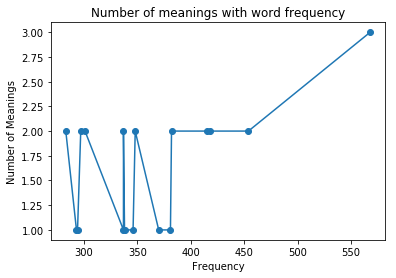

In [5]:
meanings = [['talk','incident','saying'],['friend','lover'],['sir','knight'],['people','logarithm'],['days','noise'],['Goods and Service Tax'],['time'],['day','weekday'],['surname'],['nickname'],['similar','liking'],['ever,''sometimes'],['needed','necessary'],['work','business'],['company'],['home'],['very','plentiful']]
for i in range(len(meanings)):
    print(words[i],':',meanings[i])
no_of_meanings = [len(i) for i in meanings]
plt.plot(frequency,no_of_meanings,marker='o')
plt.xlabel('Frequency')
plt.ylabel('Number of Meanings')
plt.title('Number of meanings with word frequency')
plt.show()

### Using Lipf's first law it can also be written as:
\begin{align}
m \propto \frac{1}{\sqrt{r}}
\end{align}

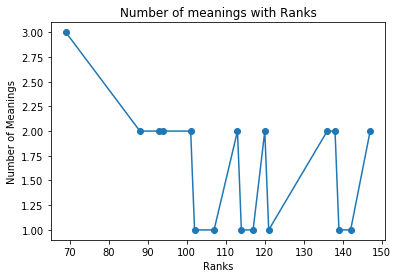

In [6]:
plt.plot(ranks,no_of_meanings,marker='o')
plt.xlabel('Ranks')
plt.ylabel('Number of Meanings')
plt.title('Number of meanings with Ranks')
plt.show()

## Length

### Word frequency is inversely proportional to its length
\begin{align}
l \propto \frac{1}{f}
\end{align}

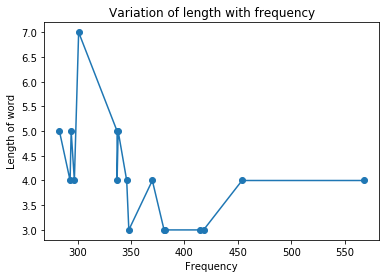

In [7]:
lengths = [len(c) for c in words]
plt.plot(frequency, lengths,marker='o')
plt.xlabel("Frequency")
plt.ylabel("Length of word")
plt.title("Variation of length with frequency")
plt.show()

# Q3: Heap's Law

### Heap's law follows the equation:
\begin{align}
|V| = KN^\beta
\end{align}
### To fit curve to this data, it is converted to a linear formula by applying logarithms
\begin{align}
log(V) = log(K) + \beta * log(N)
\end{align}

K =  4.328758070805066
beta =  0.7291066527230102


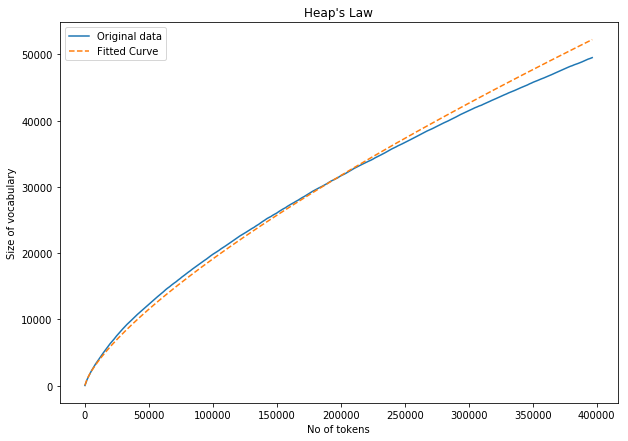

In [8]:
V = np.log10(size_of_vocab)
N = np.reshape(np.log10(tokens_count),(-1,1))
reg = LinearRegression().fit(N,V)
print("K = ", 10**reg.intercept_)
print("beta = ", float(reg.coef_))

y = (10**reg.intercept_)*np.power(tokens_count,reg.coef_)
plt.figure(figsize=(10,7))
plt.plot(tokens_count,size_of_vocab,label="Original data")
plt.plot(tokens_count, y,'--', label="Fitted Curve")
plt.legend()
plt.xlabel("No of tokens")
plt.ylabel("Size of vocabulary")
plt.title("Heap's Law")
plt.show()